### Flickr30


In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from data_utils import Flickr30
%matplotlib inline

In [2]:
Flickr30_image_path = 'ImgCap/data/Flickr30/imges'
Flickr30_labels_path = 'ImgCap/data/Flickr30/results.csv'

with open("ImgCap/vocab.pkl", 'rb') as f:
        vocab = pickle.load(f)

Flickr30_DataSet = Flickr30(Flickr30_image_path, Flickr30_labels_path, vocab=vocab)

In [3]:
examble = "Hello my name is sherif ahemd and I can fly."
tokens = Flickr30_DataSet.encoder(examble)
tokens

tensor([   2, 1023, 1004, 1001, 1008, 1008, 1011, 1023, 1009, 1021, 1023, 1010,
         997, 1009, 1001,   12, 1023, 1015, 1004, 1001, 1014, 1005, 1002, 1023,
         997, 1004, 1001, 1009, 1000,   10, 1023, 1005,  634, 1023, 1002, 1008,
        1021,    6,    3])

In [4]:
len(tokens), len(examble)

(39, 44)

In [5]:
Flickr30_DataSet.decoder(tokens)

'<sos> hello my name is sherif ahemd and i can fly .<eos>'

In [6]:
Flickr30_DataSet.vocab.get_stoi()[' girl']

32

In [7]:
vocab = Flickr30_DataSet.vocab.get_stoi()
vocab

{'x': 1020,
 'v': 1018,
 's': 1015,
 'r': 1014,
 'q': 1013,
 'm': 1009,
 'i': 1005,
 'h': 1004,
 'f': 1002,
 'b': 998,
 ' passes': 996,
 ' motorcycles': 995,
 ' kayak': 994,
 ' hitting': 992,
 ' balcony': 987,
 ' trash': 986,
 ' bottom': 983,
 'p': 1012,
 ' part': 977,
 ' gives': 975,
 ' sea': 973,
 ' robe': 972,
 ' opening': 969,
 ' denim': 967,
 ' teenagers': 966,
 ' tunnel': 961,
 ' style': 960,
 ' cheerleaders': 959,
 'k': 1007,
 ' stunt': 958,
 ' seven': 957,
 ' half': 956,
 ' paved': 953,
 ' blouse': 950,
 ' skinned': 945,
 ' obstacle': 944,
 ' here': 941,
 ' whilst': 938,
 ' carnival': 936,
 ' wetsuit': 931,
 ' boats': 928,
 ' wide': 927,
 ' dances': 923,
 ' but': 951,
 ' project': 918,
 ' checking': 963,
 ' marching': 917,
 ' including': 916,
 ' splashing': 910,
 ' pushes': 904,
 ' khaki': 903,
 ' fallen': 902,
 ' chef': 899,
 ' fans': 990,
 ' teeth': 897,
 ' stuffed': 896,
 ' picnic': 895,
 ' decorated': 893,
 ' friend': 887,
 ' bicyclist': 885,
 ' matching': 884,
 ' cut': 881

In [8]:
len(Flickr30_DataSet)

158915

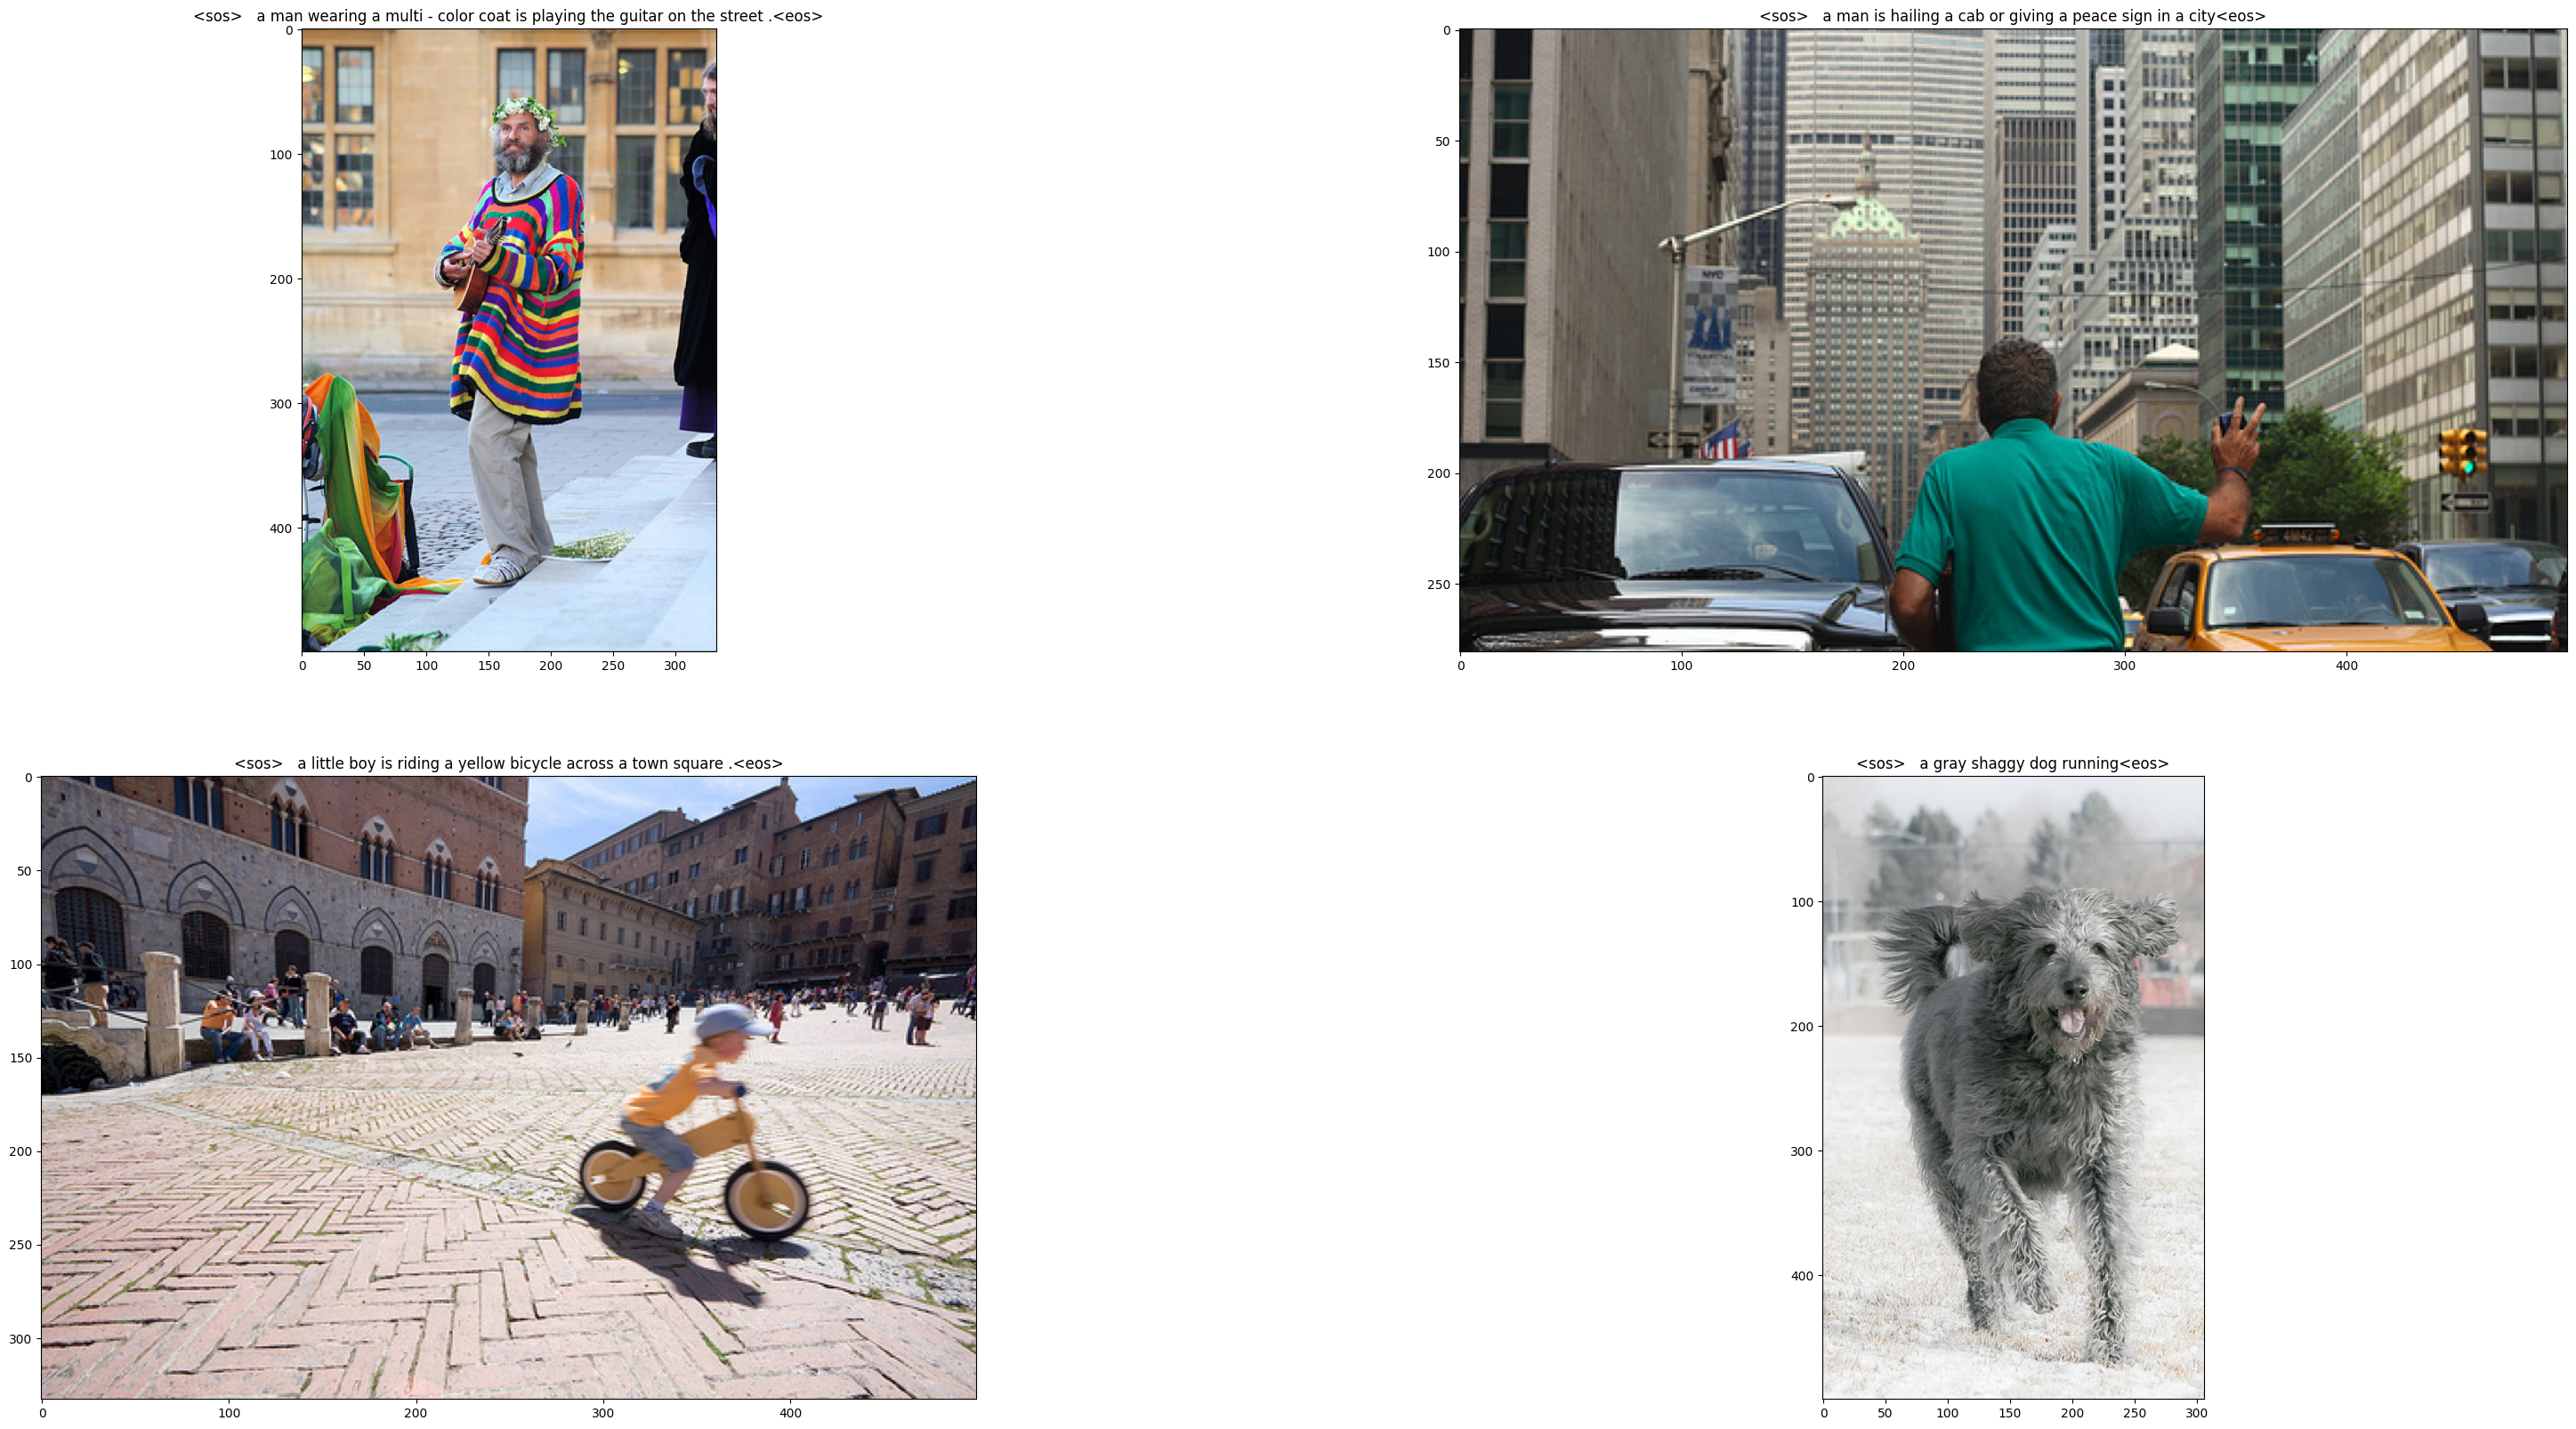

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(40, 20)) 
samples = torch.randint(len(Flickr30_DataSet), (4, ))  

for i , idx in enumerate(samples.tolist()):
    i, j = i//2 , i%2
    ax[i][j].imshow(Flickr30_DataSet[idx][0])
    caption = Flickr30_DataSet.decoder(Flickr30_DataSet[idx][1])
    ax[i][j].set_title(caption)
fig.show()